# [SPLEX] - TME 5 - Gaussian Mixture Models and the Expectation-Maximization Algorithm

The goal of the TME is to understand the Expectation-Maximization algorithm, and to learn how to use it for practical 
reasons.
We will use the scikit-learn Python library http://scikit-learn.org which is already installed on the computers.

Data
(some simulated data sets + data sets of TME 1)
We explore two data sets downloadable from the Machine Learning Repository (http://archive.ics.uci.edu/ml/index.php)
•Breast Cancer Wisconsin (Diagnostic) Data Set (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
•Mice Protein Expression Data Set (https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression)

## Libraries
Need to load the following packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import mixture
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

## Analysis

First of all, we will do analysis on a simulated one-dimensional data.  It will help to understand how the EM algorithm 
performs optimization.  Do not forget that it can be helpful to visualize the obtained clustering if your data are 1- or 2-dimensional.

### 1. Construct one-dimensional simulated data as follows:

In [18]:
mu1, sigma1 = 0, 0.3 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 100)
y1 = np.repeat(0, 100)
mu2, sigma2 = 2, 0.3 # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, 100)
y2 = np.repeat(1, 100)
mu = [mu1, mu2]
sigma = [sigma1, sigma2]
data = np.concatenate([s1,s2])
y = np.concatenate([y1,y2])

print("sigma =", sigma)
print("mu = ", mu)
#print("data = " ,data)
print("shape of data = " , data.shape)


sigma = [0.3, 0.3]
mu =  [0, 2]
shape of data =  (200,)


### 2.  Here are some necessary functions, and the procedure to run EM in a one-dimensional case [...]

### [...] 3.  Test the one-dimensional case on the simulated data

In [3]:
def pr_single_comp(mu, sigma, x):
    prob = []
    for i in range(0, x.shape[0]):
        prob.append(np.exp(-0.5*((x[i,]-mu)/sigma)**2)/sigma)
    return prob

def pr_single_normalized(mu,sigma, x):
    unnorm_prob = pr_single_comp(mu, sigma, x)
    normalization = np.sum(pr_single_comp(mu, sigma, x), axis=1)
    prob = []
    for i in range(0, len(unnorm_prob)):
        prob.append(unnorm_prob[:][i]/normalization[i])
    return prob

def update_mu(x,mu,sigma) :
    prob = pr_single_normalized(mu,sigma,x)
    hat_mu = [0, 0]
    for i in range(0, len(prob)) :
        hat_mu = hat_mu + prob[i][:]*x[i,]
    hat_mu = hat_mu/np.sum(pr_single_normalized(mu, sigma, x), axis=0)
    return hat_mu

def update_sigma(x,mu,sigma) :
    prob = pr_single_normalized(mu,sigma,x)
    hat_sigma = [0, 0]
    for i in range(0, len(prob)) :
        hat_sigma = hat_sigma + prob[i][:]*(x[i,] - mu)**2
    hat_sigma = hat_sigma/np.sum(pr_single_normalized(mu, sigma, x), axis=0)
    return hat_sigma

mu_old = [random.uniform(-2, 2), random.uniform(0, 4)]
sigma_old = [0.3, 0.3]
NbIter = 10

print(mu_old)

[1.920467060365918, 3.676359069058747]


In [4]:
# Learning procedure (optimization)

for iter in range(1, NbIter):
    hat_mu = update_mu(data,mu_old,sigma_old)
    hat_sigma = update_sigma(data,mu_old,sigma_old)
    print("iter", iter)
    print("updated mu = ",hat_mu)
    print("updated sigma = ",hat_sigma)
    mu_old = hat_mu
    sigma_old = hat_sigma + 1e-13

iter 1
updated mu =  [0.98448902 2.75535908]
updated sigma =  [1.95810983 0.85150213]
iter 2
updated mu =  [0.52873556 1.98503712]
updated sigma =  [1.04069374 0.79686614]
iter 3
updated mu =  [0.36942103 1.85861981]
updated sigma =  [0.7028455  0.39651988]
iter 4
updated mu =  [0.10315138 2.00599862]
updated sigma =  [0.33633349 0.12905582]
iter 5
updated mu =  [0.04256591 2.01055127]
updated sigma =  [0.15308911 0.10053131]
iter 6
updated mu =  [-0.00386896  1.99176375]
updated sigma =  [0.08927676 0.10786365]
iter 7
updated mu =  [-0.00386896  1.99176375]
updated sigma =  [0.08712056 0.10751068]
iter 8
updated mu =  [-0.00386896  1.99176375]
updated sigma =  [0.08712056 0.10751068]
iter 9
updated mu =  [-0.00386896  1.99176375]
updated sigma =  [0.08712056 0.10751068]


### 4.  Generate the simulated two-dimensional data from the TME 2 (blobs, moons, etc.)

New calculations are necessary on the three simulated data below in order to provide new versions of the functions and of the learning procedure for the two-dimensional case hereafter:

- mean of the data
- covariance matrix of the data 

[[ 0.57770158 -0.65921044]
 [-0.65921044  1.88711487]]


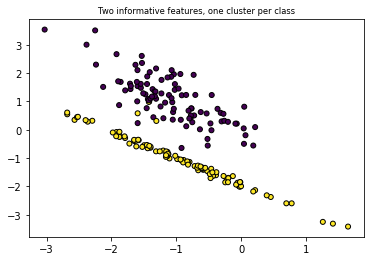

In [5]:
# First simulated data set
plt.title("Two informative features, one cluster per class", fontsize="small")
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
n_clusters_per_class=1)
mu1feature1=np.mean(X1[0])
mu1feature2=np.mean(X1[1])
#std1feature1=np.std(X1[0])
#std1feature2=np.std(X1[1])
cov_matrix1=np.cov(np.transpose(X1))
print(cov_matrix1)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1,s=25, edgecolor="k")

[[ 52.58781152 -22.62042217]
 [-22.62042217  10.96514261]]


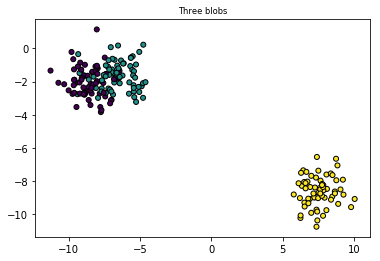

In [6]:
# Second simulated data set
plt.title("Three blobs", fontsize="small")
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
mu2feature1=np.mean(X2[0])
mu2feature2=np.mean(X2[1])
#std2feature1=np.std(X2[0])
#std2feature2=np.std(X2[1])
cov_matrix2=np.cov(np.transpose(X2))
print(cov_matrix2)
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor="k")

[[ 0.75879397 -0.19105562]
 [-0.19105562  0.24361775]]


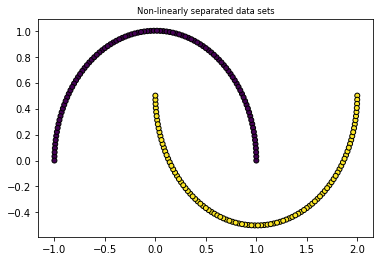

In [7]:
# Third simulated data set
plt.title("Non-linearly separated data sets", fontsize="small")
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
mu3feature1=np.mean(X3[0])
mu3feature2=np.mean(X3[1])
#std3feature1=np.std(X3[0])
#std3feature2=np.std(X3[1])
cov_matrix3=np.cov(np.transpose(X3))
print(cov_matrix3)

plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=Y3, s=25, edgecolor="k")


let's concatenate the three sets of data

In [8]:
data = np.concatenate([X1, X2, X3])
mu_old=[[mu1feature1, mu2feature1, mu3feature1],[mu1feature2, mu2feature2, mu3feature2]]
#sigma_old=[[std1feature1, std2feature1, std3feature1],[std1feature2, std2feature1, std3feature1]]
sigma_old=[cov_matrix1, cov_matrix2, cov_matrix3] 
print(mu_old)
print(sigma_old)
Y=np.concatenate([Y1, Y2, Y3])

[[-0.9975362381802078, -0.8641163396558533, 0.05044442020448664], [-0.3622600953548739, -5.559280604244931, 0.47564271167963285]]
[array([[ 0.57770158, -0.65921044],
       [-0.65921044,  1.88711487]]), array([[ 52.58781152, -22.62042217],
       [-22.62042217,  10.96514261]]), array([[ 0.75879397, -0.19105562],
       [-0.19105562,  0.24361775]])]


### 5.  Provide versions of the functions and of the learning procedure for the two-dimensional case [...]

### [...] 6.  Test  your  EM  code  for  two-dimensional  data  on  three  data  sets  from  the  TME  2  (blobs,moons, etc.)

Main changes:

- The list of the probabilities changes from a list of 200 rows 1 column to an array of 200 rows 2 columns
- the list of the means of each group is now a list containing other list for each feature. Each feature list contains the mean for all groups.
- the variance within one group is represented by a matrix of variance-covariance given that there are several variables describing each group. So the final list would be a list of 3 elements (because there are 3 groups), each element representing one group. And an element represents a matrix of variance-covariance. Here the matrix dimension is 2X2 given that each group is described by 2 variables.

In [9]:
lignes=3
colonnes=2
lst = [[0] * colonnes for _ in range(lignes)]
print(lst)
print(lst[1])

print(len(lst[1]))
print(lst[2][1])
#print(lst)

[[0, 0], [0, 0], [0, 0]]
[0, 0]
2
0


In [10]:
def pr_single_comp(mu, sigma, x):
    prob = [[0] * x.shape[1] for _ in range(x.shape[0])]
    for j in range(0, x.shape[1]):
        for i in range(0, x.shape[0]):
            prob[i][j]=(np.exp(-0.5*((x[i,j]-mu)/sigma)**2)/sigma)
    return prob

def pr_single_normalized(mu,sigma, x):
    unnorm_prob = pr_single_comp(mu, sigma, x)
    normalization = np.sum(pr_single_comp(mu, sigma, x), axis=0)
    prob = [[0] * x.shape[1] for _ in range(x.shape[0])]
    for i in range(0, len(unnorm_prob)):
        for j in range(0, len(unnorm_prob[1])):
            prob[i][j]=(unnorm_prob[i][j]/normalization[j])
    return prob

def update_mu(x,mu,sigma) :
    prob = pr_single_normalized(mu,sigma,x)
    hat_mu = [[0, 0, 0], [0, 0, 0]]
    for j in range(0, len(prob[1])):
        for i in range(0, len(prob)) :
            hat_mu = hat_mu + prob[i][j]*x[i][j]
        hat_mu = hat_mu/np.sum(pr_single_normalized(mu, sigma, x), axis=0)
    return hat_mu

def update_sigma(x,mu,sigma) :
    prob = pr_single_normalized(mu,sigma,x)
    hat_sigma = [[[0, 0], [0, 0]], [[0, 0], [0, 0]], [[0, 0], [0, 0]]]
    for j in range(0, len(prob[1])):
        for i in range(0, len(prob)) :
            hat_sigma = hat_sigma + prob[i][j]*(x[i][j] - mu)**2
        hat_sigma = hat_sigma/np.sum(pr_single_normalized(mu, sigma, x), axis=0)
    return hat_sigma


NbIter = 10



In [11]:
# Learning procedure (optimization)

for iter in range(1, NbIter):
    hat_mu = update_mu(data,mu_old,sigma_old)
    hat_sigma = update_sigma(data,mu_old,sigma_old)
    print("iter", iter)
    print("updated mu = ",hat_mu)
    print("updated sigma = ",hat_sigma)
    mu_old = hat_mu
    sigma_old = hat_sigma + 1e-13

ValueError: operands could not be broadcast together with shapes (2,3) (3,2,2) 

### 7.  Explore the EM from the sklearn library http://scikit-learn.org/stable/modules/mixture.html #the-dirichlet-process [...]
Since you perform clustering, and we do not know an optimal number of clusters, the BIC score can help to identify a model with an optimal number of components.  You can use the
following scheme to fix the number of clusters, and to fit a model:

### [...] 8.  Explore  what  you  get  with mixture.GaussianMixture() on  the  three  artificial  data  sets from the TME 2

bic =  [6579.8255738129665, 6244.361495218039, 4686.22183262801, 4670.17170301439, 6358.343753438083, 5708.455119236055, 4668.357023842939, 4679.556193628476, 6479.325295828029, 6231.80962463043, 4669.824483479469, 4690.5282704175115, 6358.343753438083, 5452.739765033975, 4653.648779291928, 4522.702090640005]
 
 
gmm for X1 =  GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
 
 
[3 3 3 3 3 3 1 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3
 3 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3
 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3
 3 3 3 3 3 

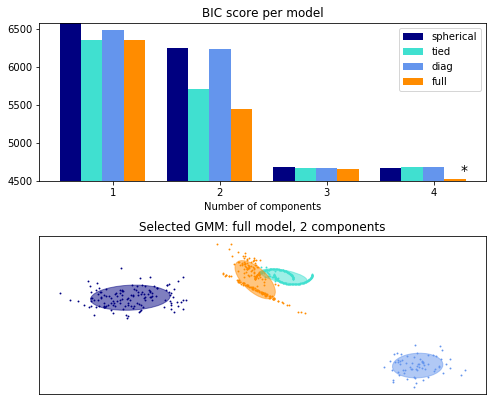

In [17]:
# Let's start by exploring the one-dimensional data:

X= data

lowest_bic = np.infty
bic = []
n_components_range = range(1, 5)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range: # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
y_predicted = best_gmm.predict(X)

print("bic = ", bic)
print(" \n ")
print("gmm for X1 = ", gmm)
print(" \n ")
print(y_predicted)

import itertools
from scipy import linalg
import matplotlib as mpl

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores


plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

### 9.  Explore what results you get in a high-dimensional problem, i.e.  in the Mice task and for the Breast Cancer using the mixture.GaussianMixture() from sklearn

In [ ]:
X= pd.read_table("breast-cancer-wisconsin.data")

lowest_bic = np.infty
bic = []
n_components_range = range(1, 5)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range: # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
y_predicted = best_gmm.predict(X)

print("bic = ", bic)
print(" \n ")
print("gmm for data = ", gmm)
print(" \n ")
print("prediction of classes = ", y_predicted)

### 10.  In what cases the EM provides a reasonable clustering?  When the EM does not work well?